In [10]:
import pandas as pd
import stringdist
import telluric as tl
from sklearn import preprocessing

In [5]:
from Idealista import Idealista
from Geofinder import Geofinder

In [7]:
class string_conversion:
    text = ''
    value = 1

In [8]:
def alias_dictionary(a1, a2, treshold = 0.6):
    aliases = {}
    for nei in a1:
        alias = string_conversion()
        alias.text = nei
        aliases[nei] = alias
        for bar in a2:
            distance = stringdist.levenshtein_norm(nei.lower(),bar.lower())
            if distance < alias.value and distance <= treshold:
                alias.value = distance
                alias.text = bar
                aliases[nei] = alias                
    return aliases   

def alias_list(aliases):
    alias = []
    for key in aliases:
        if aliases[key].value < 1:
            alias.append(aliases[key].text)
    return alias

def real_list(aliases):
    real = []
    for key in aliases:
        if aliases[key].value < 1:
            real.append(key)
    return real

def alias_values(aliases):
    for key in aliases:
        if aliases[key].value >= 0:
            print(key + ' ---- ' + aliases[key].text + ' ----- ' + str(aliases[key].value))

In [6]:
geofinder = Geofinder()

In [7]:
distance_ranking = geofinder.get_neighborhoods('Valencia 156', 1800)

In [8]:
distance_ranking

[("l'Antiga Esquerra de l'Eixample", 17),
 ("La Nova Esquerra de l'Eixample", 11),
 ("Dreta de l'Eixample", 6),
 ('Sant Gervasi-Galvany', 4),
 ('Sant Antoni', 4),
 ('El Raval', 3),
 ('Les Corts', 3),
 ('Sants', 2),
 ('Vila de Gràcia', 2),
 ('El Gòtic', 2),
 ('El Poblesec', 1),
 ('Montjuïc', 1),
 ('Hostafrancs', 1)]

In [12]:
idealista = Idealista()

In [13]:
idealista.load_homes(min_price=300, max_price=800)

In [14]:
availability_ranking = idealista.ranking_neighborhood()

In [15]:
availability_ranking

[('Vila de Gràcia', 14),
 ('El Raval', 13),
 ('El Fort Pienc', 12),
 ("L'Antiga Esquerra de l'Eixample", 12),
 ('Sant Gervasi - Galvany', 11),
 ('El Putxet i el Farró', 10),
 ('La Sagrada Família', 9),
 ("La Dreta de l'Eixample", 9),
 ('El Gòtic', 9),
 ('El Baix Guinardó', 8),
 ("La Nova Esquerra de l'Eixample", 8),
 ('Sant Antoni', 7),
 ('Sant Pere - Santa Caterina i la Ribera', 7),
 ('Les Corts', 7),
 ('Vilapicina i la Torre Llobeta', 6),
 ('El Poble Sec - Parc de Montjuïc', 6),
 ('La Maternitat i Sant Ramon', 5),
 ('Hostafrancs', 5),
 ('El Guinardó', 4),
 ("El Camp d'En Grassot i Gràcia Nova", 3),
 ('Navas', 3),
 ('El Clot', 3),
 ('La Salut', 2),
 ('El Congrés i els Indians', 2),
 ('El Parc i la Llacuna del Poblenou', 2),
 ('La Sagrera', 2),
 ('La Marina del Port', 2),
 ('Sant Andreu', 2),
 ('Sants', 2),
 ('La Guineueta', 1),
 ('Pedralbes', 1),
 ('La Trinitat Nova', 1),
 ('Horta', 1),
 ('El Poblenou', 1),
 ('Can Peguera - El Turó de la Peira', 1),
 ('Sarrià', 1),
 ('La Teixonera', 1

In [16]:
distance_neighborhoods = [i[0] for i in distance_ranking]
available_neighborhoods = [i[0] for i in availability_ranking]

In [17]:
aliases = alias_dictionary(distance_neighborhoods,available_neighborhoods, 0.25)

In [18]:
alias_values(aliases)

l'Antiga Esquerra de l'Eixample ---- L'Antiga Esquerra de l'Eixample ----- 0.0
La Nova Esquerra de l'Eixample ---- La Nova Esquerra de l'Eixample ----- 0.0
Dreta de l'Eixample ---- La Dreta de l'Eixample ----- 0.13636363636363635
Sant Gervasi-Galvany ---- Sant Gervasi - Galvany ----- 0.09090909090909091
Sant Antoni ---- Sant Antoni ----- 0.0
El Raval ---- El Raval ----- 0.0
Les Corts ---- Les Corts ----- 0.0
Sants ---- Sants ----- 0.0
Vila de Gràcia ---- Vila de Gràcia ----- 0.0
El Gòtic ---- El Gòtic ----- 0.0
El Poblesec ---- El Poblesec ----- 1
Montjuïc ---- Montjuïc ----- 1
Hostafrancs ---- Hostafrancs ----- 0.0


In [21]:
distance_values = []
available_values = []
for neighborood in real_list(aliases):
    for item in distance_ranking:
        if item[0] == neighborood:
            distance_values.append(item[1])
            break
    for item in availability_ranking:
        if item[0] == aliases[neighborood].text:
            available_values.append(item[1])
            break
    

In [10]:
security_df = pd.read_csv('security_ranking.csv', index_col='name_neighbourhood', usecols=['name_neighbourhood','zscore'])
# security_df = pd.read_csv('security_ranking.csv')

In [12]:
security_df

,zscore
name_neighbourhood,
Baró de Viver,-1.195585
Can Baró,-0.619482
Can Peguera,-1.016958
Canyelles,-1.143036
Ciutat Meridiana,-0.121059
Desconegut,NaN
Diagonal Mar i el Front Marítim del Poblenou,-0.807642
Horta,-0.908838
Hostafrancs,0.864401


In [24]:
sec_dic = alias_dictionary(real_list(aliases),list(security_df.index), 0.45)

In [25]:
alias_values(sec_dic)

l'Antiga Esquerra de l'Eixample ---- l'Antiga Esquerra de l'Eixample ----- 0.0
La Nova Esquerra de l'Eixample ---- la Nova Esquerra de l'Eixample ----- 0.0
Dreta de l'Eixample ---- la Dreta de l'Eixample ----- 0.13636363636363635
Sant Gervasi-Galvany ---- Sant Gervasi - Galvany ----- 0.09090909090909091
Sant Antoni ---- Sant Antoni ----- 0.0
El Raval ---- el Raval ----- 0.0
Les Corts ---- les Corts ----- 0.0
Sants ---- Sants ----- 0.0
Vila de Gràcia ---- la Vila de Gràcia ----- 0.17647058823529413
El Gòtic ---- el Barri Gòtic ----- 0.42857142857142855
Hostafrancs ---- Hostafrancs ----- 0.0


In [26]:
df = pd.DataFrame(distance_values, index=real_list(aliases), columns=['Distance'])
df['Availability'] = available_values
df['Security'] = security_df.loc[alias_list(sec_dic)].values

In [29]:
df

,Distance,Availability,Security
l'Antiga Esquerra de l'Eixample,17,12,0.961902
La Nova Esquerra de l'Eixample,11,8,1.771799
Dreta de l'Eixample,6,9,0.106018
Sant Gervasi-Galvany,4,11,0.500254
Sant Antoni,4,7,1.943936
El Raval,3,13,2.225767
Les Corts,3,7,0.707541
Sants,2,2,1.154139
Vila de Gràcia,2,14,1.328067
El Gòtic,2,9,0.084820


In [58]:
min_max_scaler = preprocessing.MinMaxScaler()

distance = df[['Distance']].values.astype(float)
availability = df[['Availability']].values.astype(float)
security = df[['Security']].values.astype(float)

distance_normalized = min_max_scaler.fit_transform(distance)
availability_normalized = min_max_scaler.fit_transform(availability)
security_normalized = min_max_scaler.fit_transform(security)
df_normalized = pd.DataFrame(index=df.index)
df_normalized['Distance'] = distance_normalized
df_normalized['Availability'] = availability_normalized
df_normalized['Security'] = security_normalized
df_normalized['Ranking'] = df.apply(lambda x: x['Distance'] + x['Availability'] + x['Security'], axis=1)
df_normalized = df_normalized.sort_values('Ranking', ascending=False)
df_normalized.head(3)

In [60]:
df_normalized['Ranking'] = df.apply(lambda x: x['Distance'] + x['Availability'] + x['Security'], axis=1)

In [75]:
df_normalized = df_normalized.sort_values('Ranking', ascending=False)
df_normalized.head(3)

,Distance,Availability,Security,Ranking
l'Antiga Esquerra de l'Eixample,1.000,0.833333,0.409670,29.961902
La Nova Esquerra de l'Eixample,0.625,0.500000,0.787959,20.771799
El Raval,0.125,0.916667,1.000000,18.225767


In [30]:
fc = tl.FileCollection.open("../barris_geo.json")

In [77]:
geo_alias = alias_dictionary(df_normalized.head(3).index.values,list(fc.get_values("N_Barri")))

In [78]:
geo_alias

{"l'Antiga Esquerra de l'Eixample": <__main__.string_conversion at 0x11d233588>,
 "La Nova Esquerra de l'Eixample": <__main__.string_conversion at 0x11d233c18>,
 'El Raval': <__main__.string_conversion at 0x11d2332e8>}

In [79]:
tl.FeatureCollection(barri for barri in fc if barri['N_Barri'] in alias_list(geo_alias))

/Users/seba/anaconda3/envs/telluric36/lib/python3.6/site-packages/telluric/plotting.py:171: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


[GeoFeature(Polygon, {'C_Distri': '01', 'N_Distri': 'Ciutat Vella', 'C_Barri': '01', 'N_Barri': 'el Raval', 'Homes': 26553, 'Dones': 21850, 'Area': 1098392.91379, 'Perim': 5557.372878, 'Coord_X': 430732.006258, 'Coord_Y': 4581363.15123, 'WEB_1': 'http://www.bcn.cat/ciutatvella', 'WEB_2': 'http://www.bcn.cat/estadistica/catala/dades/inf/anuari/index.htm', 'WEB_3': 'http://www.bcn.cat/estadistica/catala/dades/guiadt01/index.htm', 'WEB_4': 'http://www.bcn.cat/estadistica/catala/dades/inf/barris/a2011/barri1.pdf'}), GeoFeature(Polygon, {'C_Distri': '02', 'N_Distri': 'Eixample', 'C_Barri': '08', 'N_Barri': "l'Antiga Esquerra de l'Eixample", 'Homes': 19434, 'Dones': 22727, 'Area': 1234453.33528, 'Perim': 4851.622805, 'Coord_X': 429460.460492, 'Coord_Y': 4582529.48103, 'WEB_1': 'http://www.bcn.cat/eixample', 'WEB_2': 'http://www.bcn.cat/estadistica/catala/dades/inf/anuari/index.htm', 'WEB_3': 'http://www.bcn.cat/estadistica/catala/dades/guiadt02/index.htm', 'WEB_4': 'http://www.bcn.cat/estadistica/catala/dades/inf/barris/a2011/barri8.pdf'}), GeoFeature(Polygon, {'C_Distri': '02', 'N_Distri': 'Eixample', 'C_Barri': '09', 'N_Barri': "la Nova Esquerra de l'Eixample", 'Homes': 27038, 'Dones': 31186, 'Area': 1337656.30825, 'Perim': 4626.630284, 'Coord_X': 428937.504226, 'Coord_Y': 4581835.50048, 'WEB_1': 'http://www.bcn.cat/eixample', 'WEB_2': 'http://www.bcn.cat/estadistica/catala/dades/inf/anuari/index.htm', 'WEB_3': 'http://www.bcn.cat/estadistica/catala/dades/guiadt02/index.htm', 'WEB_4': 'http://www.bcn.cat/estadistica/catala/dades/inf/barris/a2011/barri9.pdf'})]

In [1]:
from Ranking import Ranking

In [2]:
ranking = Ranking()

In [3]:
lista = ranking.get_ranking('Almogavers 119', 1000, 300, 900, 5,3,1,6)

                                    Distance  Availability  Security
El Parc i la Llacuna del Poblenou         32             7 -0.615621
Fort Pienc                                15            14  0.997714
El Poblenou                               12             2  0.017305
S. Pere, Santa Caterina, i la Rib.         4             7  0.047497
Sagrada Familia                            3            12  2.203224
El Clot                                    3             3  0.827150
Dreta de l'Eixample                        1             5  0.106018
Provençals de Poblenou                     1             1 -0.373412
                                    Distance  Availability  Security   Ranking
El Parc i la Llacuna del Poblenou   1.000000      0.461538  0.000000  6.384615
Fort Pienc                          0.451613      1.000000  0.572339  4.685725
Sagrada Familia                     0.064516      0.846154  1.000000  1.861042
El Poblenou                         0.354839      0.076923  0.2

In [4]:
lista

array(['El Parc i la Llacuna del Poblenou', 'Fort Pienc',
       'Sagrada Familia', 'El Poblenou',
       'S. Pere, Santa Caterina, i la Rib.', "Dreta de l'Eixample"],
      dtype=object)

In [5]:
ranking.show_in_map(lista)

/Users/seba/anaconda3/envs/telluric36/lib/python3.6/site-packages/telluric/plotting.py:171: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


[GeoFeature(Polygon, {'C_Distri': '01', 'N_Distri': 'Ciutat Vella', 'C_Barri': '04', 'N_Barri': 'Sant Pere, Santa Caterina i la Ribera', 'Homes': 11466, 'Dones': 11390, 'Area': 1114298.81253, 'Perim': 4658.031512, 'Coord_X': 431822.634373, 'Coord_Y': 4582222.36348, 'WEB_1': 'http://www.bcn.cat/ciutatvella', 'WEB_2': 'http://www.bcn.cat/estadistica/catala/dades/inf/anuari/index.htm', 'WEB_3': 'http://www.bcn.cat/estadistica/catala/dades/guiadt01/index.htm', 'WEB_4': 'http://www.bcn.cat/estadistica/catala/dades/inf/barris/a2011/barri4.pdf'}), GeoFeature(Polygon, {'C_Distri': '02', 'N_Distri': 'Eixample', 'C_Barri': '05', 'N_Barri': 'el Fort Pienc', 'Homes': 15039, 'Dones': 16924, 'Area': 928901.046575, 'Perim': 4175.971325, 'Coord_X': 431670.741604, 'Coord_Y': 4583403.35904, 'WEB_1': 'http://www.bcn.cat/eixample', 'WEB_2': 'http://www.bcn.cat/estadistica/catala/dades/inf/anuari/index.htm', 'WEB_3': 'http://www.bcn.cat/estadistica/catala/dades/guiadt02/index.htm', 'WEB_4': 'http://www.bcn.cat/estadistica/catala/dades/inf/barris/a2011/barri5.pdf'}), GeoFeature(Polygon, {'C_Distri': '02', 'N_Distri': 'Eixample', 'C_Barri': '06', 'N_Barri': 'la Sagrada Família', 'Homes': 23686, 'Dones': 27937, 'Area': 1050991.15274, 'Perim': 4336.621674, 'Coord_X': 431269.360994, 'Coord_Y': 4584298.69238, 'WEB_1': 'http://www.bcn.cat/eixample', 'WEB_2': 'http://www.bcn.cat/estadistica/catala/dades/inf/anuari/index.htm', 'WEB_3': 'http://www.bcn.cat/estadistica/catala/dades/guiadt02/index.htm', 'WEB_4': 'http://www.bcn.cat/estadistica/catala/dades/inf/barris/a2011/barri6.pdf'}), GeoFeature(Polygon, {'C_Distri': '02', 'N_Distri': 'Eixample', 'C_Barri': '07', 'N_Barri': "la Dreta de l'Eixample", 'Homes': 20240, 'Dones': 23754, 'Area': 2123404.58138, 'Perim': 6460.307377, 'Coord_X': 430556.145518, 'Coord_Y': 4583021.61979, 'WEB_1': 'http://www.bcn.cat/eixample', 'WEB_2': 'http://www.bcn.cat/estadistica/catala/dades/inf/anuari/index.htm', 'WEB_3': 'http://www.bcn.cat/estadistica/catala/dades/guiadt02/index.htm', 'WEB_4': 'http://www.bcn.cat/estadistica/catala/dades/inf/barris/a2011/barri7.pdf'}), GeoFeature(Polygon, {'C_Distri': '10', 'N_Distri': 'Sant Martí', 'C_Barri': '66', 'N_Barri': 'el Parc i la Llacuna del Poblenou', 'Homes': 7231, 'Dones': 7719, 'Area': 1114038.06822, 'Perim': 5339.802362, 'Coord_X': 432407.0575, 'Coord_Y': 4583524.05951, 'WEB_1': 'http://www.bcn.cat/santmarti', 'WEB_2': 'http://www.bcn.cat/estadistica/catala/dades/inf/anuari/index.htm', 'WEB_3': 'http://www.bcn.cat/estadistica/catala/dades/guiadt10/index.htm', 'WEB_4': 'http://www.bcn.cat/estadistica/catala/dades/inf/barris/a2011/barri66.pdf'}), GeoFeature(Polygon, {'C_Distri': '10', 'N_Distri': 'Sant Martí', 'C_Barri': '68', 'N_Barri': 'el Poblenou', 'Homes': 16353, 'Dones': 17289, 'Area': 1544597.83251, 'Perim': 6358.989689, 'Coord_X': 433421.785699, 'Coord_Y': 4583668.81356, 'WEB_1': 'http://www.bcn.cat/santmarti', 'WEB_2': 'http://www.bcn.cat/estadistica/catala/dades/inf/anuari/index.htm', 'WEB_3': 'http://www.bcn.cat/estadistica/catala/dades/guiadt10/index.htm', 'WEB_4': 'http://www.bcn.cat/estadistica/catala/dades/inf/barris/a2011/barri68.pdf'})]

In [6]:
import telluric as tl
fc = tl.FileCollection.open("../barris_geo.json")

In [7]:
geo_alias = ranking.alias_dictionary(lista,list(fc.get_values("N_Barri")))
gv1 = tl.FeatureCollection(barri for barri in fc if barri['N_Barri'] in ranking.alias_list(geo_alias))


In [8]:
fc

In [20]:
a = [[2.1885308, 41.3917859], [2.1886129, 41.3938313], [2.1828153, 41.3912864], [2.1873981, 41.3950001], [2.1872448, 41.3953718], [2.1882754, 41.3942003], [2.1860942, 41.3939011]]

In [37]:
# tl.GeoFeature()
gv2 = tl.GeoVector(
    geometry.MultiPoint(a)
)

In [25]:
from shapely import geometry

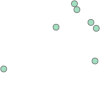

In [30]:
geometry.MultiPoint(a)

In [38]:
fc = tl.FeatureCollection([gv1, gv2])

In [39]:
fc

AttributeError: 'FeatureCollection' object has no attribute 'has_raster'

[[GeoFeature(Polygon, {'C_Distri': '01', 'N_Distri': 'Ciutat Vella', 'C_Barri': '04', 'N_Barri': 'Sant Pere, Santa Caterina i la Ribera', 'Homes': 11466, 'Dones': 11390, 'Area': 1114298.81253, 'Perim': 4658.031512, 'Coord_X': 431822.634373, 'Coord_Y': 4582222.36348, 'WEB_1': 'http://www.bcn.cat/ciutatvella', 'WEB_2': 'http://www.bcn.cat/estadistica/catala/dades/inf/anuari/index.htm', 'WEB_3': 'http://www.bcn.cat/estadistica/catala/dades/guiadt01/index.htm', 'WEB_4': 'http://www.bcn.cat/estadistica/catala/dades/inf/barris/a2011/barri4.pdf'}), GeoFeature(Polygon, {'C_Distri': '02', 'N_Distri': 'Eixample', 'C_Barri': '05', 'N_Barri': 'el Fort Pienc', 'Homes': 15039, 'Dones': 16924, 'Area': 928901.046575, 'Perim': 4175.971325, 'Coord_X': 431670.741604, 'Coord_Y': 4583403.35904, 'WEB_1': 'http://www.bcn.cat/eixample', 'WEB_2': 'http://www.bcn.cat/estadistica/catala/dades/inf/anuari/index.htm', 'WEB_3': 'http://www.bcn.cat/estadistica/catala/dades/guiadt02/index.htm', 'WEB_4': 'http://www.bc

In [14]:
distance = ranking.alias_list(ranking.aliases)

In [15]:
distance

['El Parc i la Llacuna del Poblenou',
 'El Fort Pienc',
 'El Poblenou',
 'Sant Pere - Santa Caterina i la Ribera',
 'La Sagrada Família',
 'El Clot',
 "La Dreta de l'Eixample",
 'Provençals del Poblenou']

In [16]:
set(lista).intersection(ranking.real_list(ranking.aliases))

{"Dreta de l'Eixample",
 'El Parc i la Llacuna del Poblenou',
 'El Poblenou',
 'Fort Pienc',
 'S. Pere, Santa Caterina, i la Rib.',
 'Sagrada Familia'}

In [17]:
ranking.idealista.neighborhood_locations(distance[6])

[[2.1623599, 41.3979301],
 [2.173971, 41.389221],
 [2.1672932, 41.3921565],
 [2.1648759, 41.3937036],
 [2.1703424, 41.3984904]]

In [18]:
for key in ranking.aliases:
    if key in lista:
        
#         ranking.idealista.neighborhood_locations(ranking.aliases[key].text)
        
        print(key)
        print(ranking.idealista.neighborhood_locations(ranking.aliases[key].text))
    

El Parc i la Llacuna del Poblenou
[[2.1885308, 41.3917859], [2.1886129, 41.3938313], [2.1828153, 41.3912864], [2.1873981, 41.3950001], [2.1872448, 41.3953718], [2.1882754, 41.3942003], [2.1860942, 41.3939011]]
Fort Pienc
[[2.1793879, 41.3951639], [2.1800663, 41.3995129], [2.1818647, 41.3953875], [2.1864159, 41.3972907], [2.1815752, 41.397033], [2.183109, 41.3968227], [2.183109, 41.3968227], [2.178558, 41.3979178], [2.183109, 41.3968227], [2.1830648, 41.4013513], [2.183126, 41.400878], [2.1772088, 41.3955964], [2.1804907, 41.3951366], [2.1771985, 41.3954877]]
El Poblenou
[[2.196632, 41.404429], [2.201746, 41.4004118]]
S. Pere, Santa Caterina, i la Rib.
[[2.1849359, 41.3848834], [2.179434, 41.384465], [2.1796719, 41.3877458], [2.1838575, 41.3854353], [2.1773183, 41.3878836], [2.1773183, 41.3878836], [2.178683, 41.390354]]
Sagrada Familia
[[2.1758021, 41.4068961], [2.1748221, 41.40736], [2.1746848, 41.4052447], [2.1752863, 41.4056849], [2.1758581, 41.4053814], [2.1745439, 41.4086322], [2.